## Bakytzhan Kurmanbek 
## MATH 449: Statistical Programming
## Assignment: Student-Faculty Ratios \ average ACS

<font color='red'>$$Definitions$$</font>
<font color='green'>**Student–faculty ratio**</font> is the number of students who attend a school or university divided by the number of teachers in the institution.

<font color='blue'>**Class size**</font> refers to the number of students a teacher faces during a given period of instruction.

The **student-teacher ratio** is obtained by dividing the number of full-time equivalent pupils at a given level of education by the number of full-time equivalent teachers at that level and in similar types of institutions. 

<font color='green'>**The average class size**</font> defined as the proportion of all enrolled students to particular department's classes and the number of teachers in this department.


In [1]:
# Importing necessary libraries 
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns; sns.set()
import pandas as pd

Next we read the file through pandas library and drop the first 4 rows, because they give nothing (just empty spaces in excel file), after that we reindex the data in order to be consistent with data numeration. 

In [2]:
df = pd.read_excel('../input/dataset-for-sf-ratio/list.xls')                     # Reading excel file
df = df.drop([0, 1, 2, 3], axis = 0)               # Droping the unnecessary empty rows in the data
df.index = range(602)                              # Reindexation 

## Part 1 and Part 2. 
First of all, we create **function** which returns us the number of <font color='red'>**enrolled students for this department**</font>, <font color='green'>**enrolled students for this department**</font>, <font color='blue'>**number of different courses offered by the department**</font>, <font color='cyan'>**number of different teachers in the department**</font> and <font color='magenta'>**ACS average**</font> for this specific department for this FALL 2020. We do this by looking Abbreviations of the courses (second column) and looking for desired word, then we create the boolean type locations of this word in the second column, using this we cut off necessary information out of data. After that, again using **iloc** and **sum** function from 8th column we find number of students enrolled with searched Abbreviation, similarly we find number of different teachers and number of different courses from 14th and 2nd columns respectively. Second part of the code deals with computing average ACS for different departments using above described function. After that, we create data set using of average ACS for different department and plot bar graph. 

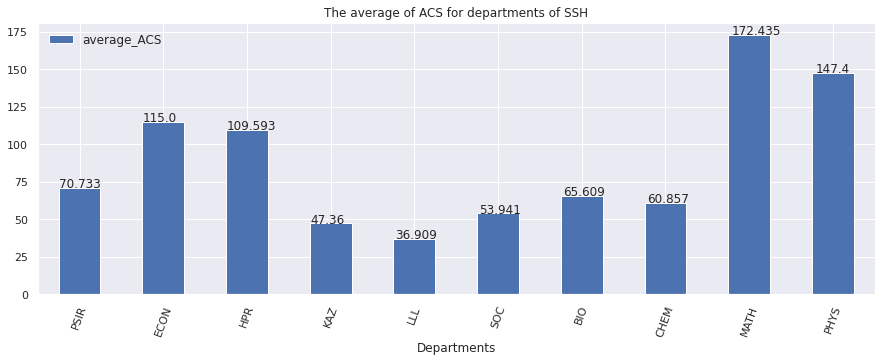

In [3]:
#---------------------------------------------------------Function---------------------------------------------------------------------------------------------------------------------------------------------#

def average_ACS(lst):
    n_students = 0
    n_courses = 0
    n_teachers = 0
    
    for stir in lst:
        str1 = [row for row in df.iloc[:, 2] if stir in row]                                             # Finding the rows where 'stir' is in the Abbrebations
        index_b = np.isin(df.iloc[:, 2], str1)                                                           # The True, False indexing according to wherher there 'stir' in the Abbrevation
        str2 = df.iloc[index_b, :]                                                                       # All the Data for rows 'stir'
        n_students = np.sum(df.iloc[index_b, 8]) + n_students                                            # Number of all enrolled students 
        n_courses  = len(df.iloc[index_b, 2].value_counts()) + n_courses                                 # Number of different courses 
        n_teachers = len(df.iloc[index_b, 14].value_counts()) + n_teachers                               # Number of different teachers
        
    ACS_average_for_department = n_students / n_teachers                                                 # The average of class size for Department
    
    return n_students, n_courses, n_teachers, ACS_average_for_department                                 # Returning all the obtained values


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#--------------------------------------------------Average ACS for different Departments----------------------------------------------------------------------------------------------------------------------------------------#


acs_psir = round(average_ACS(['PLS'])[3], 3)                                                             # Department of Political Science and International Relations
acs_econ = round(average_ACS(['ECON'])[3], 3)                                                            # Department of Economics
acs_hpr = round(average_ACS(['HST', 'PHIL', 'REL'])[3], 3)                                               # Department of History, Philosophy and Religious Studies
acs_kaz = round(average_ACS(['KAZ', 'TUR'])[3], 3)                                                       # Department of Kazakh Language and Turkic Studies 
acs_lll = round(average_ACS(['WLL', 'CHN', 'FRE', 'GER', 'RFL', 'SPA', 'EAS', 'LING', 'WCS'])[3], 3)     # Department of Languages, Linguistics and Literature
acs_soc = round(average_ACS(['SOC', 'ANT'])[3], 3)                                                       # Department of Sociology and Anthropology 
acs_bio = round(average_ACS(['BIOL'])[3], 3)                                                             # Department of Biology 
acs_chem = round(average_ACS(['CHEM'])[3], 3)                                                            # Department of Chemistry 
acs_math = round(average_ACS(['MATH'])[3], 3)                                                            # Department of Mathematics 
acs_phys = round(average_ACS(['PHYS'])[3], 3)                                                            # Department of Physics 


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#---------------------------------------------Plotting Bar Chart using average ACS for diff Dep-----------------------------------------------------------------------------------------------------------------------------------------#


data = {'Departments': ['PSIR', 'ECON', 'HPR', 'KAZ', 'LLL', 'SOC', 'BIO', 'CHEM', 'MATH', 'PHYS'], 'average_ACS': [acs_psir, acs_econ, acs_hpr, acs_kaz, acs_lll, acs_soc, acs_bio, acs_chem, acs_math, acs_phys]}
dt = pd.DataFrame(data = data)

s = dt.plot.bar(x = 'Departments', y = 'average_ACS', rot = 70, title = 'The average of ACS for departments of SSH', figsize =(15, 5))
plt.legend(loc = 'upper left', fontsize = '12', frameon = False, shadow = True, facecolor = 'blue')

for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.show(block = True)

## Some insights and  possible notes accroding to the bar graph
From the above bar chart, we can see that average ACS for Mathematics Department is relatively higher compared to other Department's average ACS. However, the lowest average ACS is in LLL Department (Department of Languages, Linguistics and Literature), which is slightly lower than the average ACS for Kazakh Language Department and Sociology Department. Interestingly, the average ACS for Economics and History (HPR) Departments are approximately equal with 115 and 109.59 respectively, and the same trend has been shown in Chemistry and Biology Departments. Overall, the science majors (math and physics) face high rate of average ACS, it can be explained by considerably high amount of courses and students enrolled to these department's subjects and the shortage of teachers in this departments. Also, majority of non-science majors expect the low rate of ACS per teacher, it could have been achieved through sufficient amount of teachers and low rate of motivation of students to take these courses. Now, it seems that the studentload for one teacher in Mathematics department is enormously high compared with other departments, but from bar chart we cannot do any conclusion that whether math teachers doing extra work compared to others, that's why we look average ACS distribution graph for Mathematics Department and we test a hypothesis, whether the average of ACS for Math Department is higher or equal to the average of ACS for all other department. 

## Part 3.
In this part, we first create a function which takes the **list** value and creates a <font color='red'>**dictionary**</font> by taking each course a key for the dictionaty and value for this key is tuple = (number of students enrolled in this course, number of different teachers who teach this course). The structure of the function similar to those which mentioned in the part 1 and 2. After that, we look to the abbrevations which do not contain **MATH** as a part, so finding this data, we manage calculate the total number of students enrolled in the non-math courses and the number of different teachers from non-math faculty, using this values we evaluate <font color='blue'>**average ACS for all other departments**</font>. Next, we separate from the abbrevations the different math abbrevations and use this list as input to our above functionto to get a dictionary (for each different math course how many students enrolled and how many different teachers are assigned to teach) of all math courses offered by Mathematics Department. After that, we choose the number of samples and sample size (not greater than 23, because 23 is the all sample of math teachers). Next, we create matrix **average ACS Math Distribution** to store the average ACS values for each sample. So, we choose randomly the professors from math department and see how many students enrolled to those professors, and calculate the average ACS values into matrix. Then, we plot all this matrix values with the **mean of this distribution**, **average ACS for all other departments** and **average ACS Math** (from previous part). After that, we calculate <font color='green'>**z-scores**</font> for each point of the distribution and for the average ACS for all other departments, then analysing the graph and z-score we make a conclusion. 

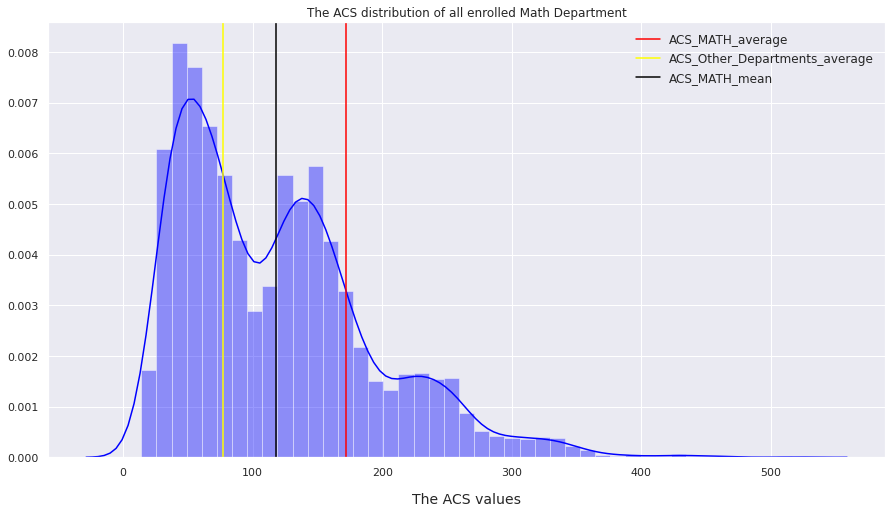

The z_score of the average ACS for all other departments not including math with respect to mean distibution: 0.5585


In [4]:
#---------------------------------------------------------Function---------------------------------------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

def math_acs_dist(lst):                                                               # Created dictionary
    d = {}                                                                            # According to different courses
    for sr in lst:                                                                    
        str1 = [row for row in df.iloc[:, 2] if sr in row]
        index_b = np.isin(df.iloc[:, 2], str1)  
        n_sr_teachers = df.iloc[index_b, 14].value_counts()[0]
        n_sr_students = np.sum(df.iloc[index_b, 8])
        d[sr] = n_sr_students, n_sr_teachers                                          # For each course how many students enrolled and how many teachers there to teach them
    return d


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#--------------------------------------------Estimating average ACS for all other Departments---------------------------------------------------------------------------------------------------------------------------------------#


other_dept1 = [row for row in df.iloc[:, 2] if 'MATH' not in row]                      # Finding the rows where MATH is not in the Abbrebations
index_a = np.isin(df.iloc[:, 2], other_dept1)                                          # The True/False positions of other dept courses without Math
other_dept2 = df.iloc[index_a, :]                                                      # All the data without math courses                                    
index_a[0] = False                                                                     # Setting the first value as False, because it is a string
N_students_other_dept = np.sum(df.iloc[index_a, 8])                                    # Number of total enrolled students without math
N_teachers_other_dept  = len(df.iloc[index_a, 14].value_counts())                      # Number of different teachers in other departments

acs_other_dept = round(N_students_other_dept/N_teachers_other_dept, 3)                 # The average ACS for other departments 


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#------------------------------------------------Creating the dictionary of all math courses-------------------------------------------------------------------------------------------------------------------------------------------------#

    
math1 = [row for row in df.iloc[:, 2] if 'MATH' in row]                                # Searching for rows where math is in the Abbreviation
index_c = np.isin(df.iloc[:, 2], math1)                                                # The True/False positions of this courses
math_teachers = df.iloc[index_c, 2].value_counts().index                               # The math teachers

dc = math_acs_dist(math_teachers)                                                      # Dictionary of math courses and number of teachers for each course


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#------------------------------------------------------average ACS_MATH distribution----------------------------------------------------------------------------------------------------------------------------------#


numberSamp = 5000
samplesize = 20

acs_distribution = np.empty(numberSamp)
for i in range(numberSamp):
    random_courses = np.random.choice(math_teachers, samplesize)
    n_st = 0
    for course in random_courses:
        n_st = int(dc[course][0]) + n_st
    acs_distribution[i] = n_st / samplesize

    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#-------------------------------------------------Plotting the distribution of average ACS-MATH ----------------------------------------------------------------------------------------------------------------------------------#


plt.figure(figsize = (15, 8))
sns.distplot(acs_distribution, color = 'blue')
plt.title('The ACS distribution of all enrolled Math Department')
plt.xlabel('The ACS values', labelpad = 15, fontsize = 14)
plt.axvline(x = acs_math, color = 'red', label = "ACS_MATH_average")
plt.axvline(x = acs_other_dept, color = "yellow", label = "ACS_Other_Departments_average")
plt.axvline(x = np.mean(acs_distribution), color = "black", label = "ACS_MATH_mean")
plt.legend(fontsize = '12', frameon = False, shadow = True, facecolor = 'blue')
plt.show()  


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------Z-score for every point---------------------------------------------------------------------------------------------------------------------------------------#
#------------------------------------------------------------Z-score of given value---------------------------------------------------------------------------------------------------------------------------------------#


def z_score(n):
    ds = pd.DataFrame(acs_distribution, columns = ['Distribution'])
    ds = ds.dropna()
    for col in ds.columns:
        col_zscore = col + '_z_score'
        ds[col_zscore] = (ds[col].mean() - ds[col])/ds[col].std(ddof = 0)
        z_sc = (ds[col].mean() - n)/ds[col].std(ddof = 0)
    return z_sc

print('The z_score of the average ACS for all other departments not including math with respect to mean distibution:', round(z_score(acs_other_dept), 4))

## Conclusion and Observations
As we can see, the above **ACS Distribution for Math Department** is <font color='blue'>not normal</font>.

However, by the theory, we know that if our estimate is unbiased and the sampling is good (fully randomly selected), then we expect the distribution graph would be approximately normal. 

In our case, the graph is bimodal and not symmetric, so there is an obvious question: <font color='red'>**Why we have non-normal distribution?**</font> Well, there are several reasons. 

<font color='green'>**Firstly**</font>, each student has different probability weights, the reason is that each student decide on their own how much course register in FALL 2020. For example: Student A can register 6 Math courses, another Student B can register 2 Econ courses and 2 Sociology courses, so the when we summed up the number of all enrolled students, some students summed up two, three times. It explains that why **average ACS-MATH (172.435)** shifted right from the mean of the distribution.

<font color='green'>**Secondly**</font>, professors can teach in several departments. For example, one professor (*Halit Akarka*) can work simultaneously in the Department of HST (History, Philosophy and Religious Studies) and Department of Kazakh Language and Turkic Studies. It also causes confusion in estimating the average ACS, because some professors estimated two or three times, because of large number of them work in non-math majors, that's why the **average ACS for all other departments** shifted left from the mean of distribution.

<font color='green'>**Thirdly**</font>, one subject can be offered in two different departments, such as ANT, WLL, TUR, HST courses. As in the second case, it increases confusion, and because of several over-estimation the **average ACS for all other departments** pulled close to mean density of ACS_Math.  

<font color='green'>**Finally**</font>, the density of Undergraduate students and Graduate students differ a lot, the low proportion of enrollment in the courses and low amount of teachers in grad schools considerably affects the average value of ACS. 

<font color='red'>**If we assume that the mean ACS distribution approximately equals to average ACS for Math Department**</font>, then the graph should be normal, and by estimated value of z-score of **average ACS for all other departments** is 0.5447 < 1.96. So, in this case, we <font color='red'>**fail to reject the null hypothesis.**</font>

<font color='blue'>**In conclusion**</font>, if we don't assume that the mean of distribution is not equal to the average ACS MATH value, we cannot make any judgements about null hypethesis. 